## ANOVA - Two-Way Test

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Data Preparation

In [3]:
# task dictionary
task_dict = {
    'stroop_vanilla': 'task-td7i',
    'stroop_progressbar': 'task-lupf',
    'stroop_eyes': 'task-c9op',
#     'stroop_video': 'task-najf',
    'stroop_posneg': 'task-on6n',
    'stroop_final': 'task-7g42',
    'stroop_bonus': 'task-3kpz',
    'rdk_vanilla': 'task-2ywa',
    'rdk_progressbar': 'task-sks3',
    'rdk_eyes': 'task-zyvq',
#     'rdk_video': 'task-6e3k',
    'rdk_posneg': 'task-ivrk',
    'rdk_final': 'task-sq3v',
    'rdk_bonus': 'task-hvii',
    'bandit_vanilla': 'task-dwkr',
    'bandit_progressbar': 'task-25bt',
    'bandit_eyes': 'task-x158',
#     'bandit_video': 'task-9ndm',
    'bandit_posneg': 'task-tzk1',
    'bandit_final': 'task-gn7s',
    'bandit_bonus': 'task-iaas',
}

# task-separated arrays
# stroop_arr = ["stroop_vanilla", "stroop_progressbar", "stroop_eyes", "stroop_video", "stroop_posneg", "stroop_final", "stroop_bonus"]
# rdk_arr = ["rdk_vanilla", "rdk_progressbar", "rdk_eyes", "rdk_video", "rdk_posneg", "rdk_final", "rdk_bonus"]
# bandit_arr = ["bandit_vanilla", "bandit_progressbar", "bandit_eyes", "bandit_video", "bandit_posneg", "bandit_final", "bandit_bonus"]
stroop_arr = ["stroop_vanilla", "stroop_progressbar", "stroop_eyes", "stroop_posneg", "stroop_final", "stroop_bonus"]
rdk_arr = ["rdk_vanilla", "rdk_progressbar", "rdk_eyes", "rdk_posneg", "rdk_final", "rdk_bonus"]
bandit_arr = ["bandit_vanilla", "bandit_progressbar", "bandit_eyes", "bandit_posneg", "bandit_final", "bandit_bonus"]

In [4]:
stroop_list = []

for manip in stroop_arr:
    stroop_df = pd.read_csv('./data_exp_99963-v4/data_exp_99963-v4_' + task_dict[manip] + '.csv')
    stroop_df.drop(stroop_df[stroop_df['Event Index'] == 'END OF FILE'].index, inplace = True)
    stroop_list.append(stroop_df)
    
# for manip in stroop_arr:
#     stroop_df = pd.read_csv('./data_exp_96489-v3/data_exp_96489-v3_' + task_dict[manip] + '.csv')
#     stroop_df.drop(stroop_df[stroop_df['Event Index'] == 'END OF FILE'].index, inplace = True)
#     stroop_list.append(stroop_df)
    
stroop_df = pd.concat(stroop_list)
stroop_df = stroop_df[[
    "Tree Node Key",
    "Participant Private ID",
    "Screen Name",
    "Attempt",
    "Correct",
    "Incorrect"
]]

rdk_list = []

for manip in rdk_arr:
    rdk_df = pd.read_csv('./data_exp_99963-v4/data_exp_99963-v4_' + task_dict[manip] + '.csv')
    rdk_df.drop(rdk_df[rdk_df['Event Index'] == 'END OF FILE'].index, inplace = True)
    rdk_list.append(rdk_df)
    
# for manip in rdk_arr:
#     rdk_df = pd.read_csv('./data_exp_96489-v3/data_exp_96489-v3_' + task_dict[manip] + '.csv')
#     rdk_df.drop(rdk_df[rdk_df['Event Index'] == 'END OF FILE'].index, inplace = True)
#     rdk_list.append(rdk_df)
    
rdk_df = pd.concat(rdk_list)
rdk_df = rdk_df[[
    "Tree Node Key",
    "Participant Private ID",
    "Screen Name",
    "Attempt",
    "Correct",
    "Incorrect"
]]


bandit_list = []

for manip in bandit_arr:
    bandit_df = pd.read_csv('./data_exp_99963-v4/data_exp_99963-v4_' + task_dict[manip] + '.csv')
    bandit_df.drop(bandit_df[bandit_df['Event Index'] == 'END OF FILE'].index, inplace = True)
    bandit_list.append(bandit_df)
    
# for manip in bandit_arr:
#     bandit_df = pd.read_csv('./data_exp_96489-v3/data_exp_96489-v3_' + task_dict[manip] + '.csv')
#     bandit_df.drop(bandit_df[bandit_df['Event Index'] == 'END OF FILE'].index, inplace = True)
#     bandit_list.append(bandit_df)
    
bandit_df = pd.concat(bandit_list)
bandit_df = bandit_df[[
    "Tree Node Key",
    "Participant Private ID",
    "Screen Name",
    "Attempt",
    "Correct",
    "Incorrect"
]]

C:\Users\Devank\AppData\Local\Temp/ipykernel_6572/2369746899.py:4: DtypeWarning: Columns (0,58) have mixed types. Specify dtype option on import or set low_memory=False.
  stroop_df = pd.read_csv('./data_exp_99963-v4/data_exp_99963-v4_' + task_dict[manip] + '.csv')
C:\Users\Devank\AppData\Local\Temp/ipykernel_6572/2369746899.py:26: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  rdk_df = pd.read_csv('./data_exp_99963-v4/data_exp_99963-v4_' + task_dict[manip] + '.csv')
C:\Users\Devank\AppData\Local\Temp/ipykernel_6572/2369746899.py:49: DtypeWarning: Columns (0,58) have mixed types. Specify dtype option on import or set low_memory=False.
  bandit_df = pd.read_csv('./data_exp_99963-v4/data_exp_99963-v4_' + task_dict[manip] + '.csv')


In [5]:
def accuracy_df_builder(df, arr, task):
    
    performance_df = pd.DataFrame(columns=['Participant', 'Task', 'Manipulation', 'Accuracy'])
    for manip in arr:

        focus_df = df[df['Tree Node Key'] == task_dict[manip]]
        participants = focus_df['Participant Private ID'].unique().tolist()
        if len(participants) < 1:
            accuracies.append(overall_accuracy)
            continue
        
        for participant in participants:
            participant_df = focus_df[focus_df['Participant Private ID'] == participant]
            participant_df = participant_df[participant_df['Screen Name'] == 'trial'][['Attempt', 'Correct', 'Incorrect']]

            if participant_df.empty:
                participants.remove(participant)
                continue

            # for timeouts
            participant_df['Attempt'].fillna(0, inplace = True)
            
            accuracy = participant_df['Correct'].sum() * 100 / len(participant_df)
            performance_df = performance_df.append({
                'Participant': participant,
                'Task': task,
                'Manipulation': manip,
                'Accuracy': accuracy
            }, ignore_index=True)
            
    return performance_df

In [6]:
def sample_equal_lowest_rows(df):
    
    # get lowest count
    task_manip_groups = list(df.groupby(['Task', 'Manipulation']).groups.keys())
    min_count = df.shape[0]
    for i in range(len(task_manip_groups)):
        min_count = min(min_count, df[
            (df["Task"] == task_manip_groups[i][0]) & 
            (df["Manipulation"] == task_manip_groups[i][1])
        ].shape[0])
    
    # selecting min_count rows for each group
    new_df = pd.DataFrame(columns=df.columns)
    for (task, manip) in task_manip_groups:
        new_df = new_df.append(df[
            (df["Task"] == task) & 
            (df["Manipulation"] == manip)
        ].sample(min_count))
    return new_df

In [7]:
stroop_acc_df = accuracy_df_builder(stroop_df, stroop_arr, "Stroop")
rdk_acc_df = accuracy_df_builder(rdk_df, rdk_arr, "RDK")
bandit_acc_df = accuracy_df_builder(bandit_df, bandit_arr, "Bandit")

performance_df = pd.concat([stroop_acc_df, rdk_acc_df, bandit_acc_df])

# performance_df = performance_df.drop(performance_df[performance_df["Task"] == "Stroop"].index)

#### Implementing the ANOVA model

In [8]:
performance_df = performance_df.replace('rdk_', '', regex=True)
performance_df = performance_df.replace('stroop_', '', regex=True)
performance_df = performance_df.replace('bandit_', '', regex=True)

performance_df = sample_equal_lowest_rows(performance_df)
performance_df.reset_index(inplace=True)
performance_df

,index,Participant,Task,Manipulation,Accuracy
0,65,7329300.0,Bandit,bonus,40.972222
1,69,7329491.0,Bandit,bonus,44.444444
2,66,7329411.0,Bandit,bonus,32.638889
3,67,7330762.0,Bandit,bonus,33.333333
4,13,7330641.0,Bandit,eyes,31.944444
...,...,...,...,...,...
67,8,7330681.0,Stroop,progressbar,96.875000
68,2,7330659.0,Stroop,vanilla,90.625000
69,3,7281187.0,Stroop,vanilla,97.916667
70,1,7330714.0,Stroop,vanilla,96.875000


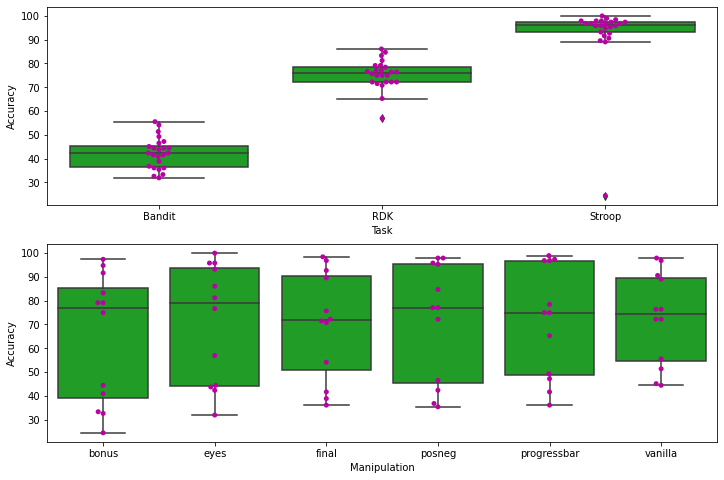

In [9]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2, 1, 1)
ax1 = sns.boxplot(x='Task', y='Accuracy', data=performance_df, color='#0db013')
ax1 = sns.swarmplot(x="Task", y="Accuracy", data=performance_df, color='#b902a2')
plt.subplot(2, 1, 2)
ax2 = sns.boxplot(x='Manipulation', y='Accuracy', data=performance_df, color='#0db013')
ax2 = sns.swarmplot(x="Manipulation", y="Accuracy", data=performance_df, color='#b902a2')
plt.show()


In [10]:
model = ols('Accuracy ~ Task + Manipulation + Task:Manipulation', data=performance_df).fit()
print(stats.shapiro(model.resid))

ShapiroResult(statistic=0.7269381284713745, pvalue=2.893928707781157e-10)


In [11]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Task,31295.357187,2.0,161.180708,1.711173e-23
Manipulation,466.695239,5.0,0.961450,4.496030e-01
Task:Manipulation,1164.193173,10.0,1.199191,3.123946e-01
Residual,5242.405578,54.0,NaN,NaN


#### Plotting Manipulations per Task

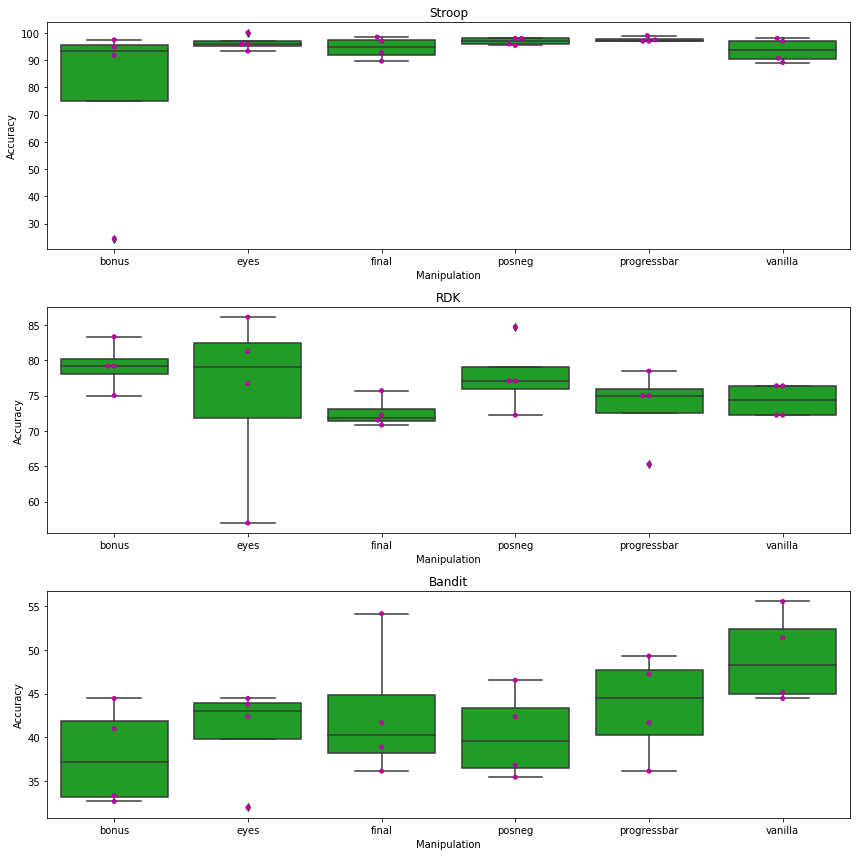

In [14]:
fig = plt.figure(figsize=(12,12))

plt.subplot(3, 1, 1)
stroop_performance_df = performance_df[performance_df["Task"] == "Stroop"]
ax1 = sns.boxplot(x='Manipulation', y='Accuracy', data=stroop_performance_df, color='#0db013')
ax1 = sns.swarmplot(x="Manipulation", y="Accuracy", data=stroop_performance_df, color='#b902a2')
ax1.set_title("Stroop")

plt.subplot(3, 1, 2)
rdk_performance_df = performance_df[performance_df["Task"] == "RDK"]
ax2 = sns.boxplot(x='Manipulation', y='Accuracy', data=rdk_performance_df, color='#0db013')
ax2 = sns.swarmplot(x="Manipulation", y="Accuracy", data=rdk_performance_df, color='#b902a2')
ax2.set_title("RDK")

plt.subplot(3, 1, 3)
bandit_performance_df = performance_df[performance_df["Task"] == "Bandit"]
ax3 = sns.boxplot(x='Manipulation', y='Accuracy', data=bandit_performance_df, color='#0db013')
ax3 = sns.swarmplot(x="Manipulation", y="Accuracy", data=bandit_performance_df, color='#b902a2')
ax3.set_title("Bandit")

fig.tight_layout()
plt.show()